In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./2025/Field_research/Utils')
from utils_curved_BAO import *
import pandas as pd
import multiprocess as mp

In [35]:
z= np.random.uniform(0.1,0.9,400)
H0 = 70
Omega_m = 0.3
Omega_lamb = 1.4
parm = [Omega_m, Omega_lamb]
M = -19.3 + 5 * np.log10(H0 / 60)
c = 299792.458  # speed of light in km/s
D_M = Other_stuff_curved(z,[Omega_m,Omega_lamb])*c/H0
dL = (1+z) * D_M
m = M + 5*np.log10(dL) + 25 + np.random.normal(0, 0.05, len(z))  # adding noise to magnitudes
dm = np.ones(len(z))*0.05 # random errors in magnitudes

In [36]:
sndata = pd.DataFrame({
    'zcmb': z,
    'mb': m,
    'dmb': dm
})

In [37]:
parm = [0.3,1.4,70]
BAO_z = np.array([0.38, 0.51, 0.61, 0.70,0.45])
BAO_ind = np.array([1,2,3,4,3])
BAO_dmb = np.array([0.05, 0.05, 0.05, 0.05, 0.05])
BAO_data = pd.DataFrame({
    'z': BAO_z,
    'ind': BAO_ind
})
BAO_d = BAO_curved(BAO_data, parm)
BAO_data = pd.DataFrame({
    'z': BAO_z,
    'err': BAO_dmb,
    'ind': BAO_ind,
    'val' : BAO_d
})

In [50]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior1 = np.array([[0.,0,4],[2.5,2.5,100]])
    normal_vec = np.array([0.1,0.1,1.])*0.1
    std = np.array([0.1, 0.1, 0.1])
    paraminit = np.array([0.3,1.4,70]) + np.random.normal(0,std)
    nstep = int(1e3)
    return MCMC_BAO(Other_stuff_curved, BAO_curved, paraminit, sndata,BAO_data, nstep, normal_vec, Prior1)

In [51]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:50<00:00,  9.09it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There a

accept_ratio = 0.013333333333333334
Best_fit = Omega_m : 0.3007038220740685, Omegalamb : 1.401913997746162, H0 : 69.96405139196241, chisq : -365.0391657043702
std = [0.00635818 0.00630353 0.41433515]


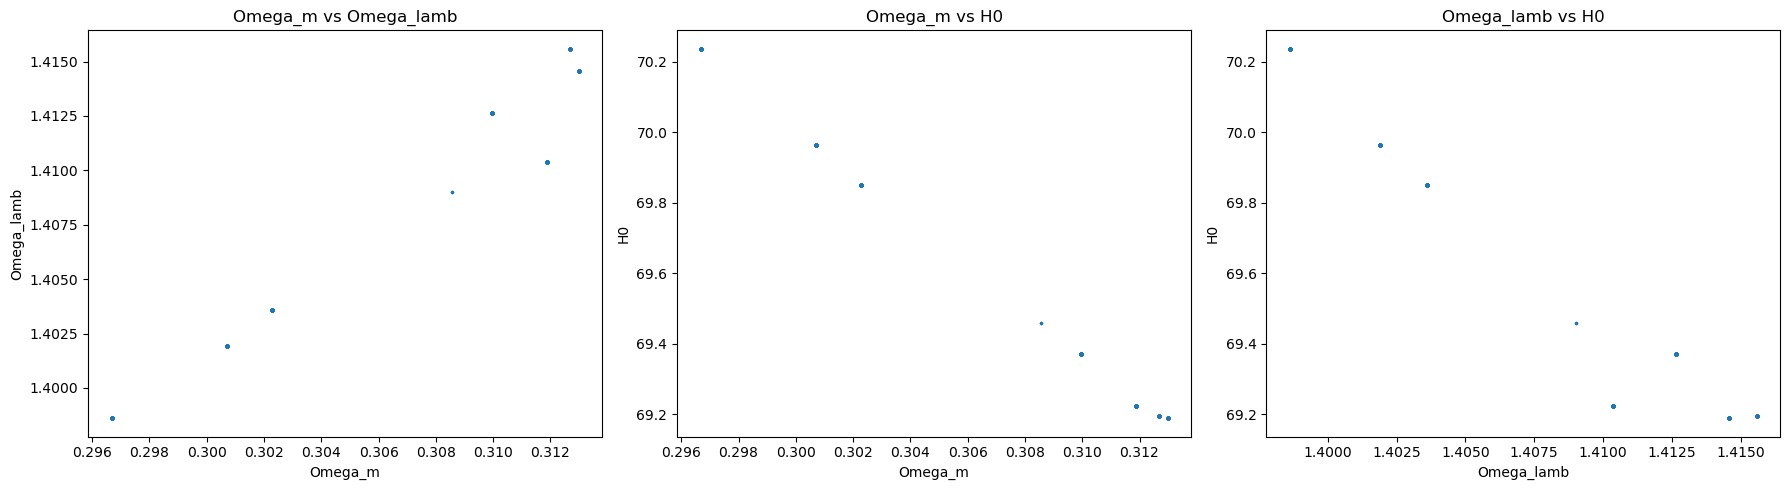

In [53]:
burn_in = 400
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
accept_ratio = np.unique(MCMC_test).shape[0] / (4e3-burn_in*4)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:3], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, H0 : {Best_fit[2]}, chisq : {Best_fit[-1]}')
print(f'std = {std}')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Omega_m vs Omega_lamb
axs[0].scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
axs[0].set_xlabel('Omega_m')
axs[0].set_ylabel('Omega_lamb')
axs[0].set_title('Omega_m vs Omega_lamb')

# 2. Omega_m vs H0
axs[1].scatter(MCMC_test[0], MCMC_test[2], s=2, alpha=0.5)
axs[1].set_xlabel('Omega_m')
axs[1].set_ylabel('H0')
axs[1].set_title('Omega_m vs H0')

# 3. Omega_lamb vs H0
axs[2].scatter(MCMC_test[1], MCMC_test[2], s=2, alpha=0.5)
axs[2].set_xlabel('Omega_lamb')
axs[2].set_ylabel('H0')
axs[2].set_title('Omega_lamb vs H0')

plt.tight_layout()
plt.show()

In [ ]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
#MCMC_test = MCMC_test[:,200:]
accept_ratio = np.unique(MCMC_test).shape[0] / (2e3*4-200*4)

Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0])
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, loglikelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.hist(MCMC_test[0],bins=50,alpha=0.5, label='Omega_m')

In [ ]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
#MCMC_test = MCMC_test[:,200:]
accept_ratio = np.unique(MCMC_test).shape[0] / (2e3*4-200*4)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, loglikelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
plt.xlabel('Omega_m')
plt.ylabel('Omega_lamb')
plt.title('MCMC result for Flat LCDM')

In [ ]:
from utils_curved_BAO import *

In [ ]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0.,0., 4.66594018],[2.5,2.5, 100]])
    std = np.array([0.00350762, 0.00320618, 0.21968244])
    normal_vec = np.array([0.00350762, 0.00320618, 0.21968244])*0.01
    paraminit = np.array([0.3,  0.7,70.]) + np.random.normal(0,std)
    nstep = int(1e3)
    return MCMC(Other_stuff_curved, BAO_curved, paraminit, sndata,BAO_data, nstep, normal_vec, Prior2)

In [ ]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))
burn_in = 400
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:41<00:00,  9.85it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There a

accept_ratio = 0.95
Best_fit = Omega_m : 0.30169174509732705, Omegalamb : 0.7015027314429648, H0 : 69.89147060633844
std = [0.00057563 0.00072869 0.04538277]


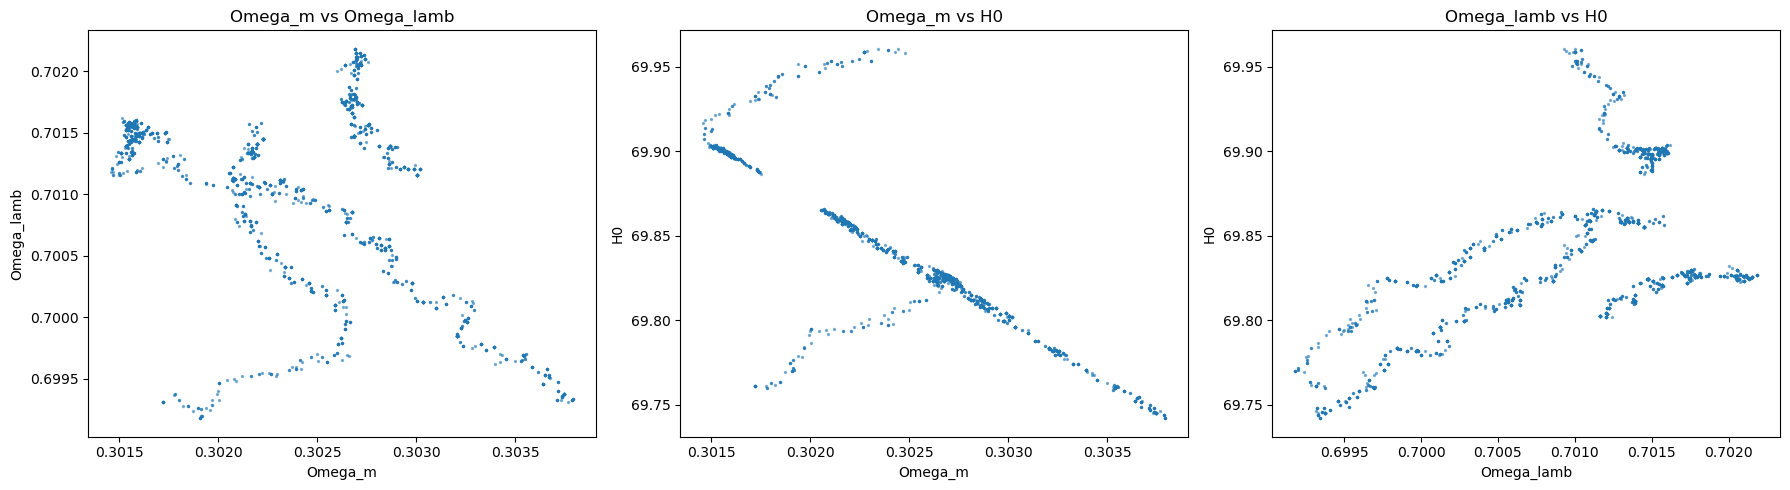

In [ ]:
accept_ratio = np.unique(MCMC_test).shape[0] / (4e3-burn_in*4)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:3], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, H0 : {Best_fit[2]}')
print(f'std = {std}')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Omega_m vs Omega_lamb
axs[0].scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
axs[0].set_xlabel('Omega_m')
axs[0].set_ylabel('Omega_lamb')
axs[0].set_title('Omega_m vs Omega_lamb')

# 2. Omega_m vs H0
axs[1].scatter(MCMC_test[0], MCMC_test[2], s=2, alpha=0.5)
axs[1].set_xlabel('Omega_m')
axs[1].set_ylabel('H0')
axs[1].set_title('Omega_m vs H0')

# 3. Omega_lamb vs H0
axs[2].scatter(MCMC_test[1], MCMC_test[2], s=2, alpha=0.5)
axs[2].set_xlabel('Omega_lamb')
axs[2].set_ylabel('H0')
axs[2].set_title('Omega_lamb vs H0')

plt.tight_layout()
plt.show()